In [10]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator, plot

%matplotlib inline
%config InlineBackend.figure_format='retina'

请求延迟分布情况

download-latency-4KB-max-direct-1clients.csv
download-latency-4KB-max-hedged-1clients.csv
download-latency-4KB-max-tied-1clients.csv


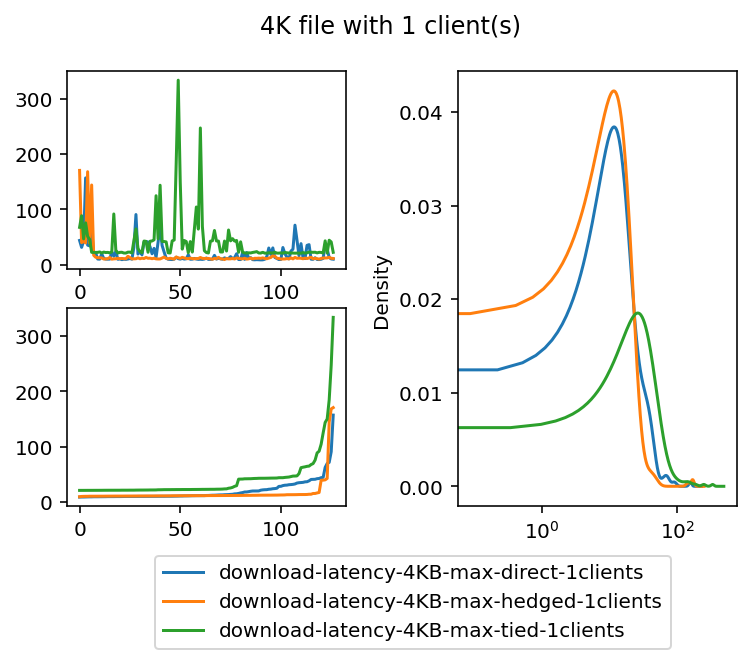

download-latency-4KB-max-direct-16clients.csv
download-latency-4KB-max-hedged-16clients.csv
download-latency-4KB-max-tied-16clients.csv


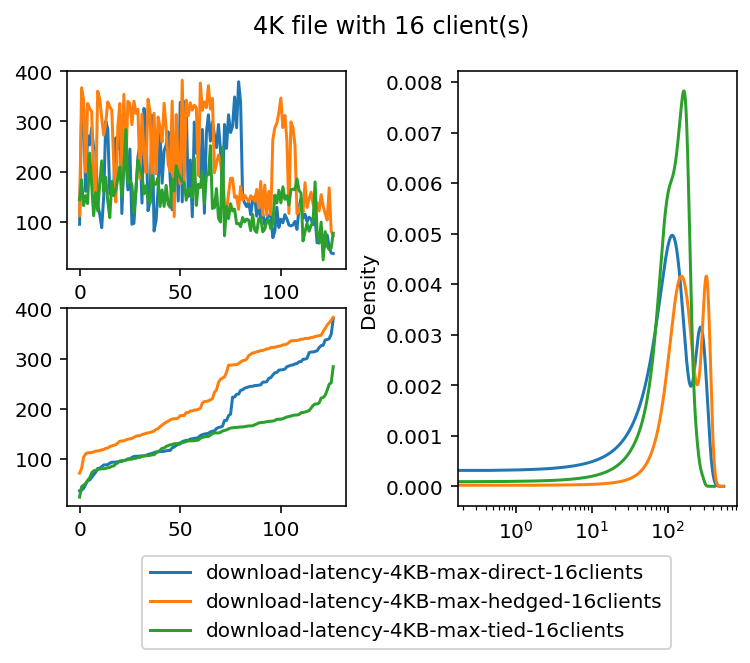

download-latency-4KB-max-direct-64clients.csv
download-latency-4KB-max-tied-64clients.csv
download-latency-4KB-max-hedged-64clients.csv


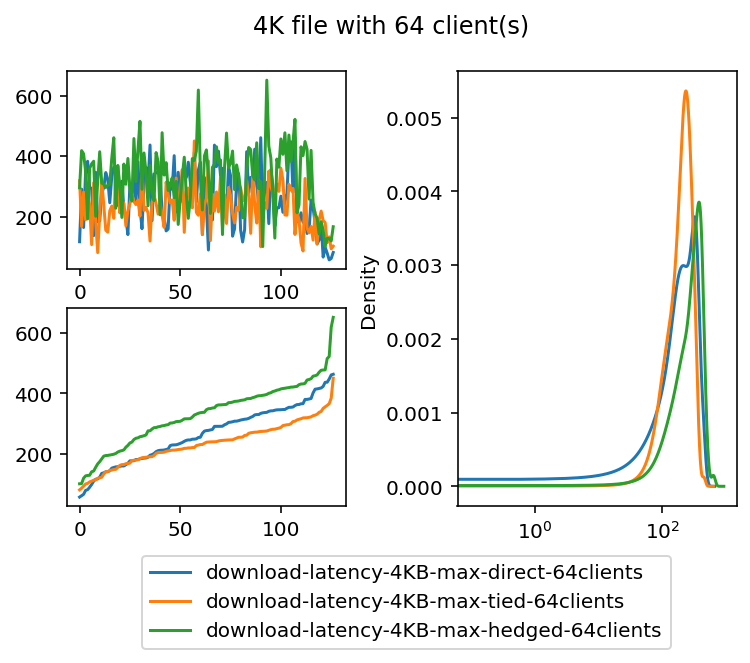

download-latency-256KB-max-tied-1clients.csv
download-latency-256KB-max-direct-1clients.csv
download-latency-256KB-max-hedged-1clients.csv


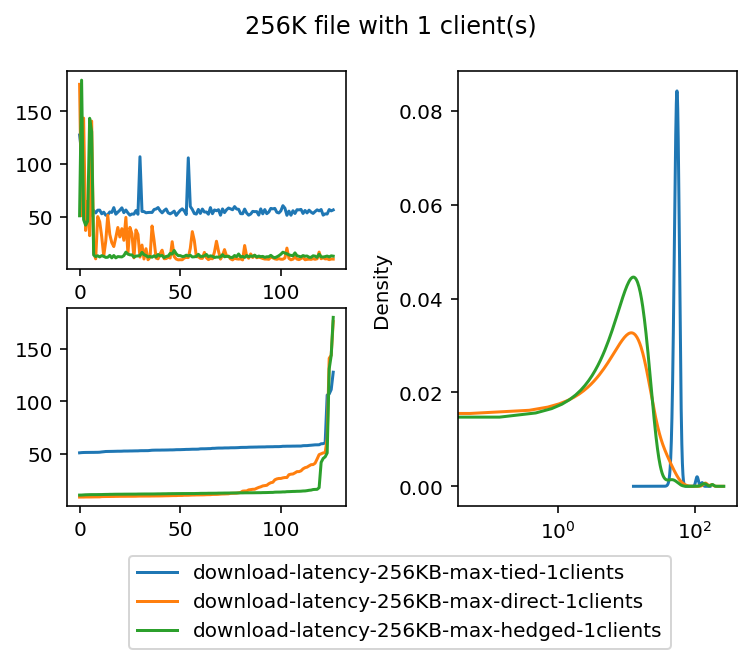

download-latency-256KB-max-direct-16clients.csv
download-latency-256KB-max-hedged-16clients.csv
download-latency-256KB-max-tied-16clients.csv


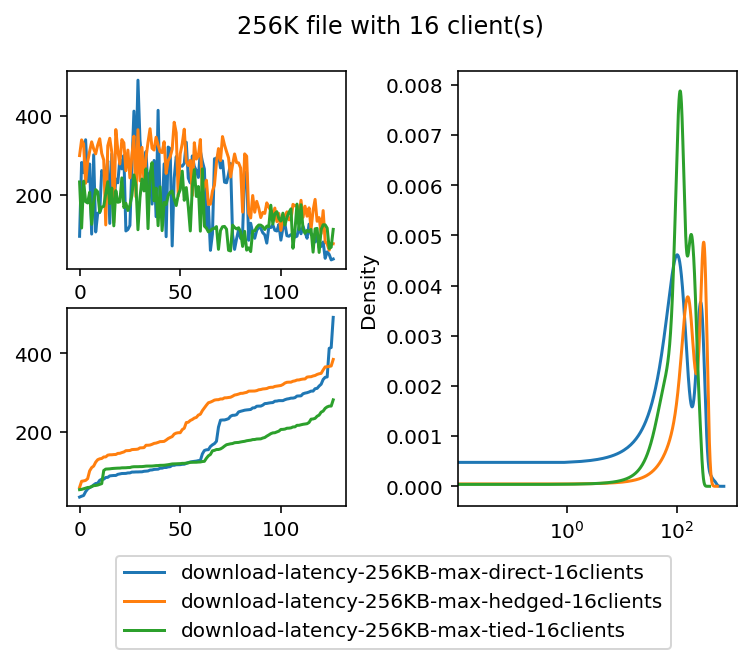

download-latency-256KB-max-tied-64clients.csv
download-latency-256KB-max-hedged-64clients.csv
download-latency-256KB-max-direct-64clients.csv


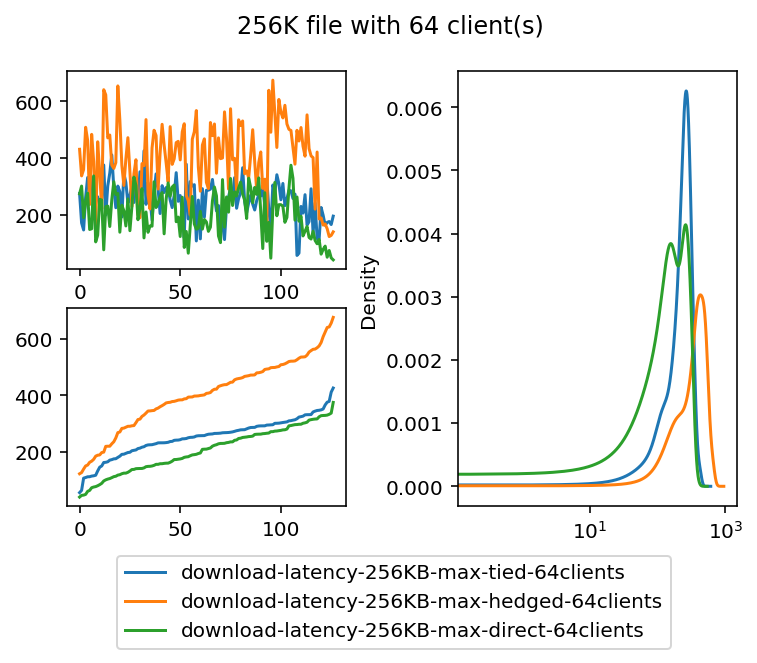

download-latency-1024KB-max-hedged-1clients.csv
download-latency-1024KB-max-direct-1clients.csv
download-latency-1024KB-max-tied-1clients.csv


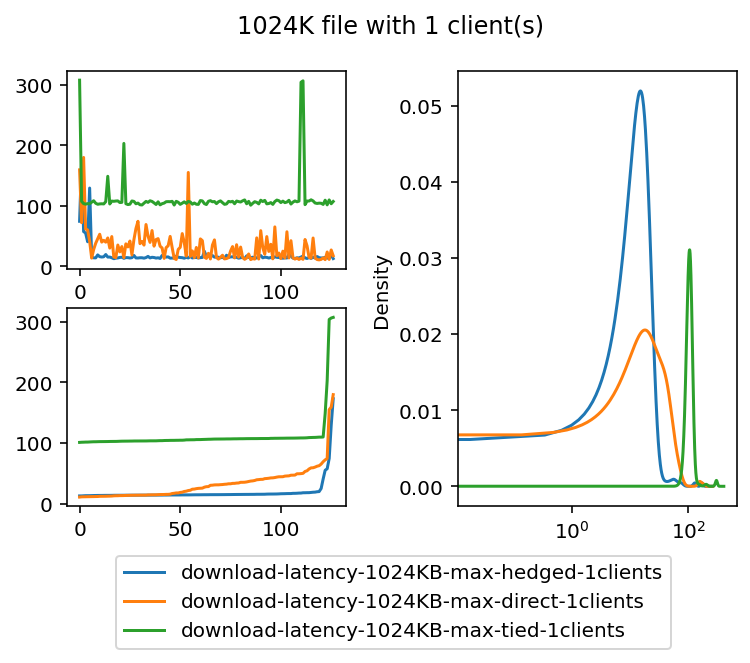

download-latency-1024KB-max-tied-16clients.csv
download-latency-1024KB-max-direct-16clients.csv
download-latency-1024KB-max-hedged-16clients.csv


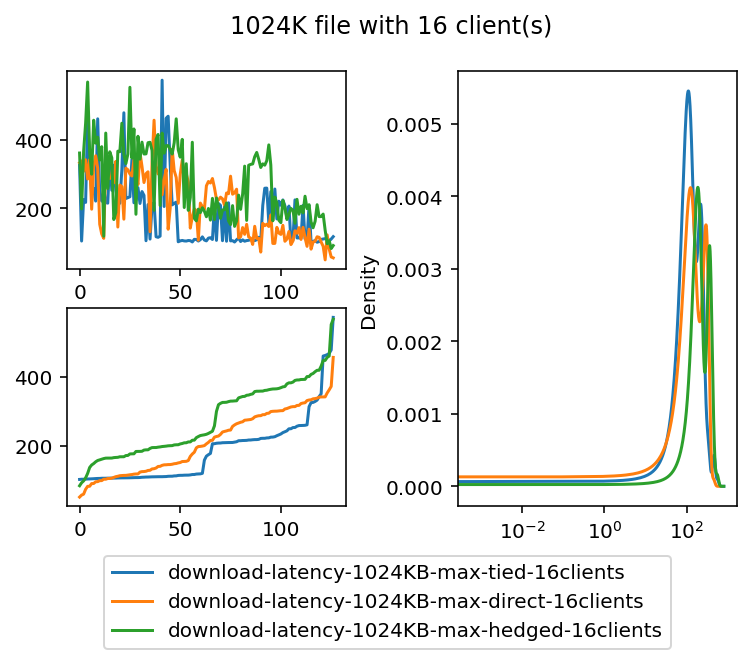

download-latency-1024KB-max-tied-64clients.csv
download-latency-1024KB-max-direct-64clients.csv
download-latency-1024KB-max-hedged-64clients.csv


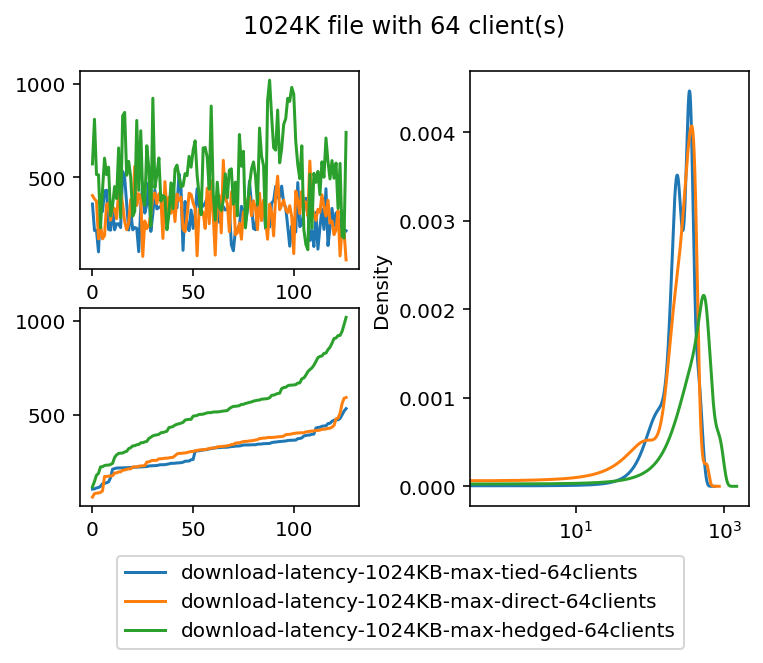

download-latency-4096KB-max-direct-1clients.csv
download-latency-4096KB-max-hedged-1clients.csv
download-latency-4096KB-max-tied-1clients.csv


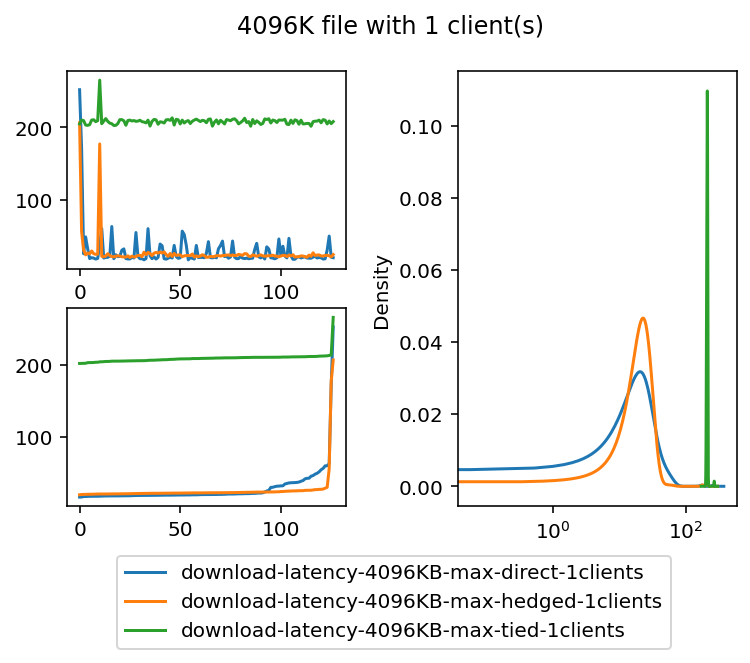

download-latency-4096KB-max-direct-16clients.csv
download-latency-4096KB-max-hedged-16clients.csv
download-latency-4096KB-max-tied-16clients.csv


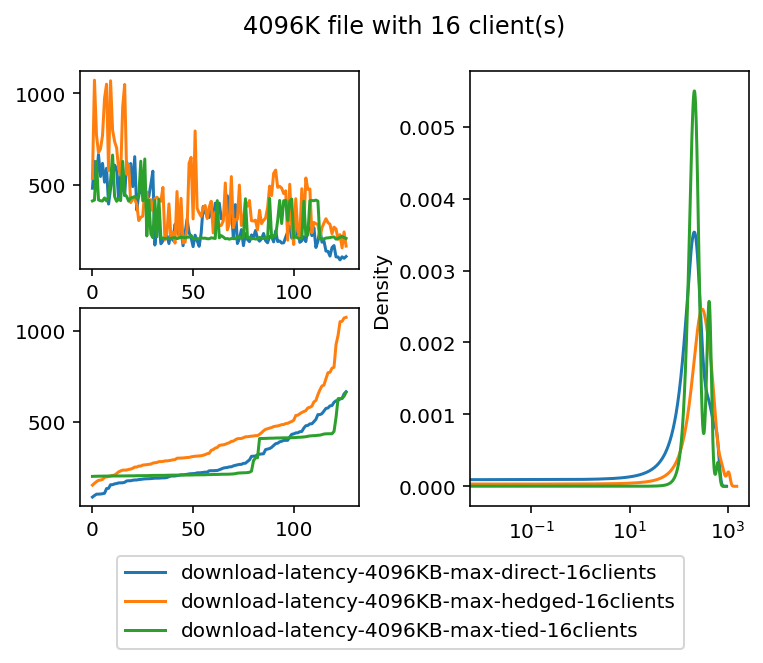

download-latency-4096KB-max-direct-64clients.csv
download-latency-4096KB-max-tied-64clients.csv
download-latency-4096KB-max-hedged-64clients.csv


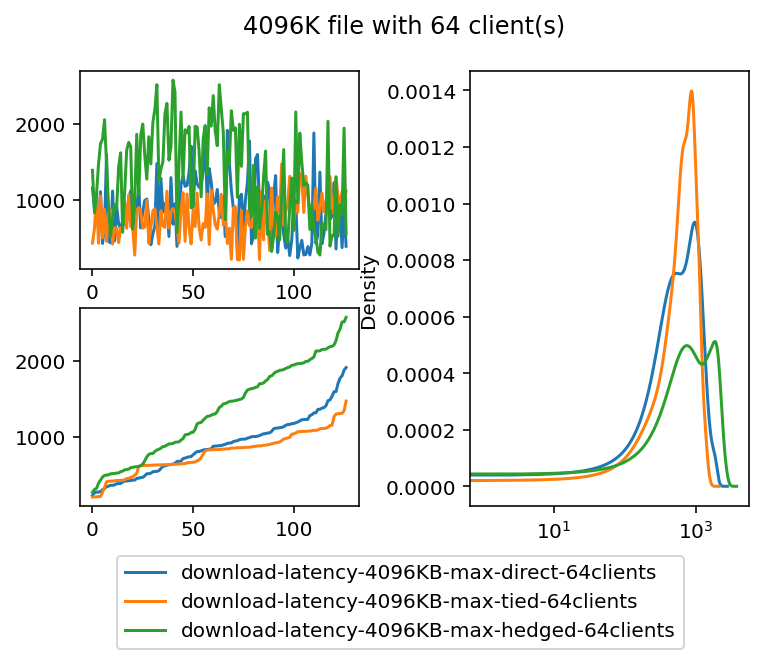

In [131]:
for file_size in ['4K', '256K', '1024K', '4096K']:
    for clients in ['1', '16', '64']:
        
        fig, axs = plt.subplots(ncols=2, nrows=2)
        fig.suptitle(f'{file_size} file with {clients} client(s)')
        ax1 = axs[0, 0]
        ax2 = axs[1, 0]
        gs = axs[0, 1].get_gridspec()
        for ax in axs[0:, -1]:
            ax.remove()
        axbig = fig.add_subplot(gs[0:, -1])

        for file in glob.glob(f'download*-{file_size}*{clients}clients*.csv'):
            print(file)
            latency = pd.read_csv(file).apply(pd.to_numeric)

            ax1.plot(latency.values, label=file.split('.')[0])
            ax2.plot(sorted(latency.values), label=file.split('.')[0])
            latency.plot.density(ax=axbig)
            axbig.get_legend().remove()
            
            #ax1.set_xscale('log')
            #ax2.set_xscale('log')
            axbig.set_xscale('log')

        ax2.legend(bbox_to_anchor=(2.2, -0.2))
        fig.subplots_adjust(wspace=0.4)
        fig.savefig(f'download-{file_size}-{clients}clients.jpg', dpi=250, bbox_inches='tight')
        plt.show()

<AxesSubplot:ylabel='Density'>

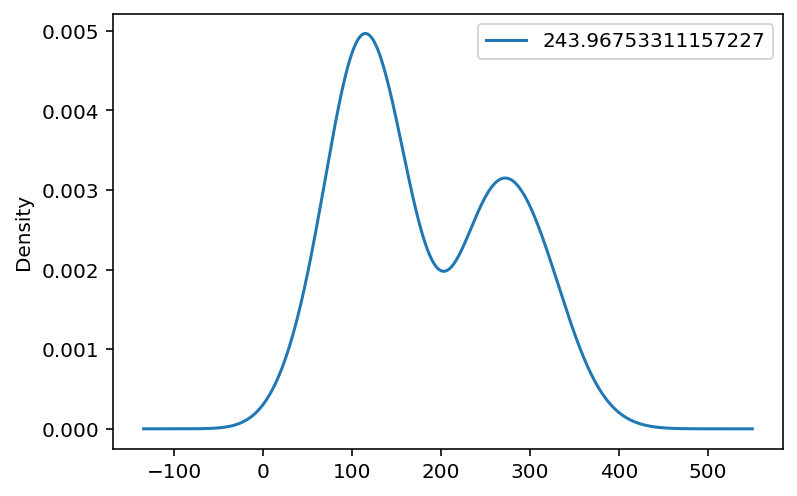

In [80]:
l = pd.read_csv('download-latency-4KB-max-direct-16clients.csv').apply(pd.to_numeric)
l.plot.density()

用排队论模型来拟合实测数据

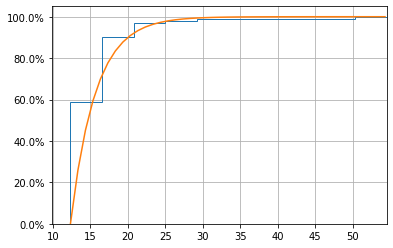

In [3]:
# 百分比换算
def to_percent(y, position):
    return str(100 * round(y, 2)) + "%"

# 设置纵轴为百分比
fomatter = FuncFormatter(to_percent)
ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(fomatter)
# 避免横轴数据起始位置与纵轴重合，调整合适座标范围
x_min = max(min(latency) * 0.8, min(latency) - 5)
x_max = max(latency)
plt.xlim(x_min, x_max)
# 绘制实际百分位延迟
plt.hist(latency, cumulative=True, histtype='step', weights=[1./ len(latency)] * len(latency))

# 排队论模型
# F(t)=1-e^(-1*a*t)
alpha = 0.3
X_qt = np.arange(min(latency), max(latency), 1.)
Y_qt = 1 - np.exp(alpha * (min(latency) - X_qt))
# 绘制排队论模型拟合
plt.plot(X_qt, Y_qt)

plt.grid()
plt.show()